In [7]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score,adjusted_rand_score

In [15]:
# Cargar el conjunto de datos
data = pd.read_csv('Country-data.csv')


In [16]:
data.head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [19]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [20]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

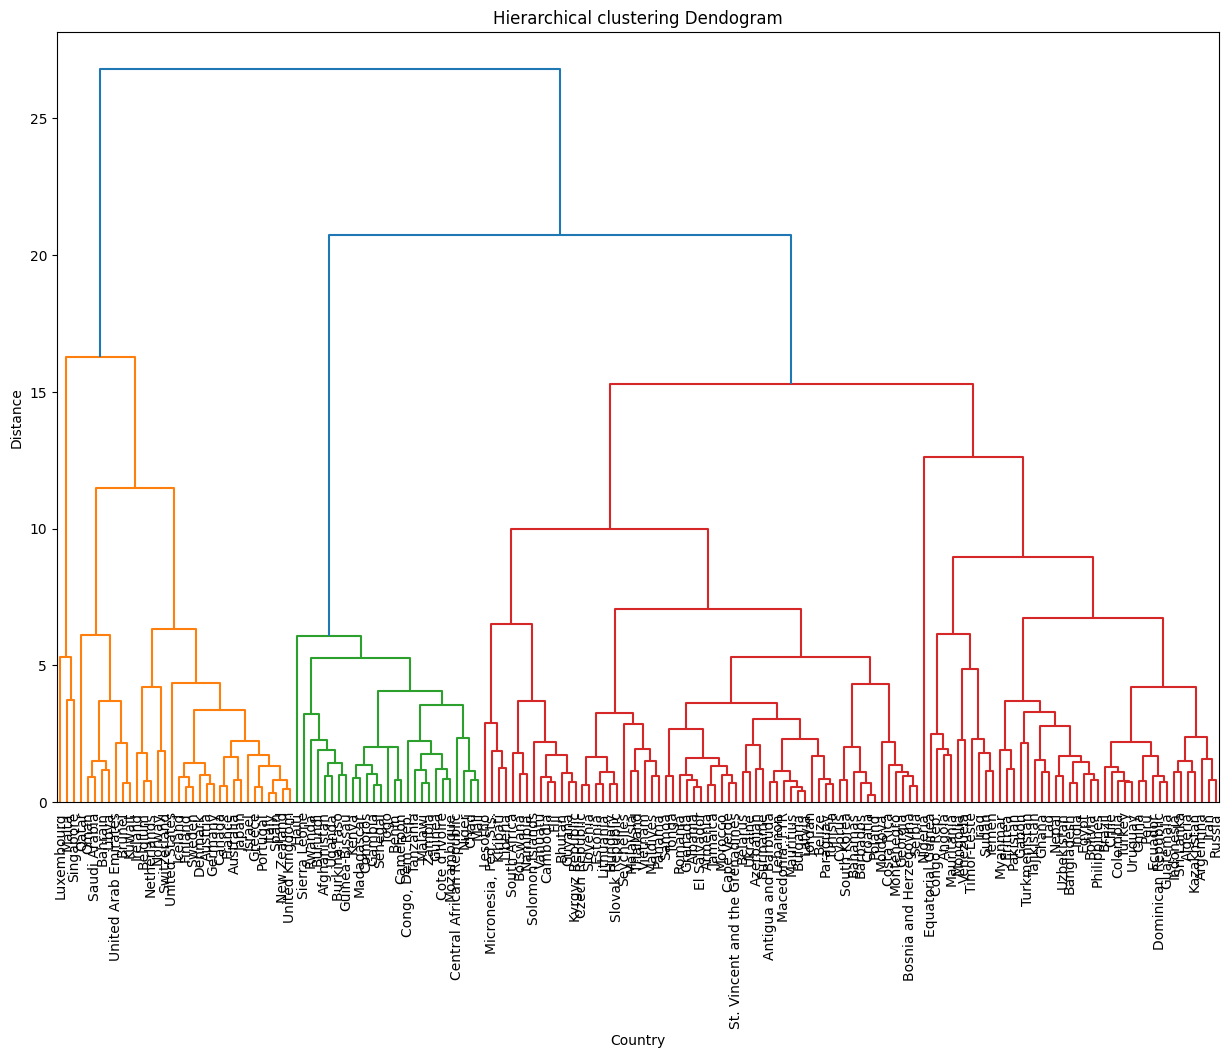

In [10]:
data_for_clustering=data.drop('country',axis=1)
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_for_clustering)

linkage_matrix=linkage(data_scaled,method='ward')


plt.figure(figsize=(15,10))
dendrogram(linkage_matrix,labels=data['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical clustering Dendogram")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

In [12]:
#Hierarchial Clustering Model
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,  linkage='ward')
labels = hierarchical_cluster.fit_predict(data_scaled)

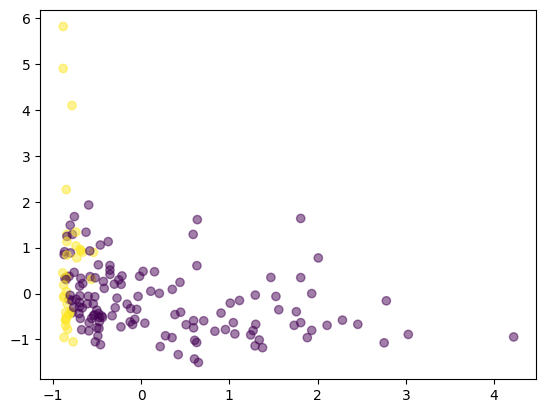

In [21]:
#Visualizing the clusters of Hierarchial Clustering
xs = data_scaled[:,0]
ys = data_scaled[:,1]
plt.scatter(xs,ys,c=labels,alpha=0.5)

In [22]:
silhouette = silhouette_score(data_for_clustering, labels)
# Calcular el índice de Calinski-Harabasz
calinski = calinski_harabasz_score(data_for_clustering, labels)
# Calcular en doeficiente de davies bouldin
davies_bouldin= davies_bouldin_score(data_for_clustering, labels)

# Imprimir los resultados
print("Coeficiente de silueta:", silhouette, ' [debe ser cercano a 1 ]')
print("Coeficiente de Davis-Bouldin:", davies_bouldin, ' [debe ser bajo ]')
print("Índice de Calinski-Harabasz:", calinski ,' [debe ser cercano a 1] ')
print()

Coeficiente de silueta: 0.7040968796654424  [debe ser cercano a 1 ]
Coeficiente de Davis-Bouldin: 0.5468479933271745  [debe ser bajo ]
Índice de Calinski-Harabasz: 332.71859134048384  [debe ser cercano a 1] 

